<a href="https://colab.research.google.com/github/rladbtls3/202401PracticeForAiDeeplearning/blob/main/chapter05_fundamentals_of_ml_i%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

Optimization: 모델이 train data에 대해 최적의 성능을 내도록 조정하는 것

Generalization: 훈련된 모델이 신규 데이터에 대해 적절한 결과를 내도록 하는 것

Regularization: 모델 과적합이 일어나는 걸 방지하는 과정

### Underfitting and overfitting

Underfitting: 과소적합, 보통 train data에서도 Acc가 낮게 나온다

Overfitting: 과적합, train data의 Acc은 높게 나오지만 validation Acc가 낮아지는 경우. 즉, 새로운 data에 대한 예측이 원활하게 이루어지지 않음.

그 중간 어딘가에 Robust fit의 지점이 있다...?

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)#noise ch 추가

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)#zeros ch 추가

11490434/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model
#모델 함수 지정

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)
#noise ch를 추가한 train data를 이용, 모델 적합

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)
#zeros ch를 추가한 train data를 이용, 모델 적합


Epoch 1/10
375/375 [==============================] - 21s 50ms/step - loss: 0.6058 - accuracy: 0.8132 - val_loss: 0.2966 - val_accuracy: 0.9091
Epoch 2/10
375/375 [==============================] - 8s 22ms/step - loss: 0.2627 - accuracy: 0.9190 - val_loss: 0.2051 - val_accuracy: 0.9392
Epoch 3/10
375/375 [==============================] - 9s 24ms/step - loss: 0.1742 - accuracy: 0.9463 - val_loss: 0.1634 - val_accuracy: 0.9510
Epoch 4/10
375/375 [==============================] - 9s 25ms/step - loss: 0.1268 - accuracy: 0.9602 - val_loss: 0.1712 - val_accuracy: 0.9462
Epoch 5/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0924 - accuracy: 0.9714 - val_loss: 0.1498 - val_accuracy: 0.9544
Epoch 6/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0680 - accuracy: 0.9787 - val_loss: 0.1321 - val_accuracy: 0.9631
Epoch 7/10
375/375 [==============================] - 9s 25ms/step - loss: 0.0528 - accuracy: 0.9835 - val_loss: 0.1270 - val_accuracy: 0.965

**Plotting a validation accuracy comparison**

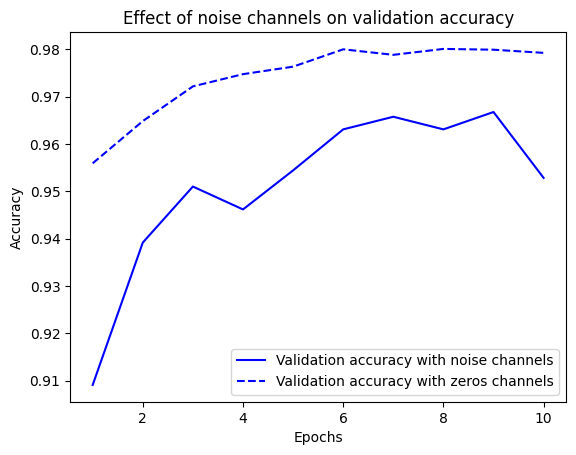

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#즉, 정제되지 않은 data는 모델 적합에 어려움을 준다는 결론
#feature selection의 중요성

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
#https://blog.naver.com/coniecual/221417921857
#manifold 참고

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 6s 14ms/step - loss: 2.3173 - accuracy: 0.1018 - val_loss: 2.3049 - val_accuracy: 0.1042
Epoch 2/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2990 - accuracy: 0.1190 - val_loss: 2.3139 - val_accuracy: 0.1017
Epoch 3/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2911 - accuracy: 0.1266 - val_loss: 2.3168 - val_accuracy: 0.1022
Epoch 4/100
375/375 [==============================] - 5s 14ms/step - loss: 2.2787 - accuracy: 0.1395 - val_loss: 2.3231 - val_accuracy: 0.1029
Epoch 5/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2636 - accuracy: 0.1531 - val_loss: 2.3346 - val_accuracy: 0.1023
Epoch 6/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2433 - accuracy: 0.1667 - val_loss: 2.3441 - val_accuracy: 0.1004
Epoch 7/100
375/375 [==============================] - 5s 14ms/step - loss: 2.2202 - accuracy: 0.1806 - val_loss: 2.3547 - val_accuracy:

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
#경사소실이 발생할 수도 있다
#다양한 방법이 있지만, learning rate를 조정함으로써 이를 방지할 수 있다
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 565.4165 - accuracy: 0.2731 - val_loss: 2.2639 - val_accuracy: 0.1653
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 2.7173 - accuracy: 0.1839 - val_loss: 2.1806 - val_accuracy: 0.1790
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 2.5210 - accuracy: 0.1745 - val_loss: 2.5377 - val_accuracy: 0.1877
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 2.4470 - accuracy: 0.1784 - val_loss: 15.1100 - val_accuracy: 0.1838
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 2.5940 - accuracy: 0.1938 - val_loss: 2.1863 - val_accuracy: 0.1797
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 2.5197 - accuracy: 0.2006 - val_loss: 2.2041 - val_accuracy: 0.1837
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 2.3807 - accuracy: 0.1982 - val_loss: 2.2887 - val_accuracy: 0.1

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)
#optimizer인 RMSprop()의 인자로 learning rate를 준다

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 0.3584 - accuracy: 0.9104 - val_loss: 0.1458 - val_accuracy: 0.9536
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1258 - accuracy: 0.9644 - val_loss: 0.1256 - val_accuracy: 0.9656
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1004 - accuracy: 0.9734 - val_loss: 0.1345 - val_accuracy: 0.9703
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0803 - accuracy: 0.9788 - val_loss: 0.1667 - val_accuracy: 0.9680
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0716 - accuracy: 0.9822 - val_loss: 0.2005 - val_accuracy: 0.9633
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0614 - accuracy: 0.9852 - val_loss: 0.1832 - val_accuracy: 0.9711
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0522 - accuracy: 0.9873 - val_loss: 0.1981 - val_accuracy: 0.9738

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
#내가 해결하고자 하는 task에 맞는 적잘한 딥러닝 model을 사용
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6628 - accuracy: 0.8374 - val_loss: 0.3590 - val_accuracy: 0.9044
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3532 - accuracy: 0.9028 - val_loss: 0.3125 - val_accuracy: 0.9117
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3183 - accuracy: 0.9109 - val_loss: 0.2934 - val_accuracy: 0.9172
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3021 - accuracy: 0.9153 - val_loss: 0.2833 - val_accuracy: 0.9232
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2926 - accuracy: 0.9187 - val_loss: 0.2786 - val_accuracy: 0.9229
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2861 - accuracy: 0.9206 - val_loss: 0.2739 - val_accuracy: 0.9248
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2807 - accuracy: 0.9218 - val_loss: 0.2721 - val_accuracy: 0.9258
Epoch 

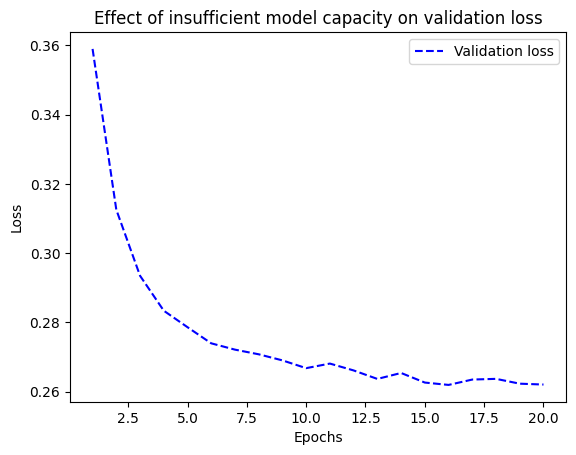

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 4s 8ms/step - loss: 0.3681 - accuracy: 0.8941 - val_loss: 0.1822 - val_accuracy: 0.9486
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1677 - accuracy: 0.9501 - val_loss: 0.1421 - val_accuracy: 0.9567
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1201 - accuracy: 0.9635 - val_loss: 0.1161 - val_accuracy: 0.9650
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0918 - accuracy: 0.9731 - val_loss: 0.1056 - val_accuracy: 0.9695
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0723 - accuracy: 0.9778 - val_loss: 0.0989 - val_accuracy: 0.9697
Epoch 6/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0585 - accuracy: 0.9823 - val_loss: 0.0932 - val_accuracy: 0.9711
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0491 - accuracy: 0.9849 - val_loss: 0.0938 - val_accuracy: 0.9733
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 84ms/step - loss: 0.5143 - accuracy: 0.7629 - val_loss: 0.3700 - val_accuracy: 0.8732
Epoch 2/20
30/30 [==============================] - 1s 50ms/step - loss: 0.3062 - accuracy: 0.8935 - val_loss: 0.3077 - val_accuracy: 0.8823
Epoch 3/20
30/30 [==============================] - 2s 66ms/step - loss: 0.2303 - accuracy: 0.9208 - val_loss: 0.2822 - val_accuracy: 0.8870
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1845 - accuracy: 0.9377 - val_loss: 0.2846 - val_accuracy: 0.8843
Epoch 5/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1525 - accuracy: 0.9499 - val_loss: 0.2804 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1306 - accuracy: 0.9585 - val_loss: 0.2884 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1117 - accurac

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.6339 - accuracy: 0.6913 - val_loss: 0.5883 - val_accuracy: 0.8409
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.5454 - accuracy: 0.8080 - val_loss: 0.5379 - val_accuracy: 0.7888
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4988 - accuracy: 0.8480 - val_loss: 0.5091 - val_accuracy: 0.8402
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4653 - accuracy: 0.8759 - val_loss: 0.4908 - val_accuracy: 0.8483
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.4404 - accuracy: 0.8959 - val_loss: 0.4774 - val_accuracy: 0.8750
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4188 - accuracy: 0.9118 - val_loss: 0.4830 - val_accuracy: 0.8308
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.4014 - accuracy: 0.9205 - val_loss: 0.4606 - val_accuracy: 0.8651
Epoch 8/20
30

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 89ms/step - loss: 0.5901 - accuracy: 0.7811 - val_loss: 0.4824 - val_accuracy: 0.8324
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3896 - accuracy: 0.8951 - val_loss: 0.3845 - val_accuracy: 0.8857
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3201 - accuracy: 0.9173 - val_loss: 0.3943 - val_accuracy: 0.8689
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2869 - accuracy: 0.9309 - val_loss: 0.3774 - val_accuracy: 0.8775
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2664 - accuracy: 0.9340 - val_loss: 0.3594 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2549 - accuracy: 0.9397 - val_loss: 0.3741 - val_accuracy: 0.8821
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2401 - accuracy: 0.9472 - val_loss: 0.3639 - val_accuracy: 0.8862
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.6319 - accuracy: 0.6423 - val_loss: 0.5162 - val_accuracy: 0.8419
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.5132 - accuracy: 0.7784 - val_loss: 0.4125 - val_accuracy: 0.8745
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.4302 - accuracy: 0.8265 - val_loss: 0.3493 - val_accuracy: 0.8805
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3689 - accuracy: 0.8651 - val_loss: 0.3209 - val_accuracy: 0.8828
Epoch 5/20
30/30 [==============================] - 2s 56ms/step - loss: 0.3259 - accuracy: 0.8823 - val_loss: 0.2896 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2899 - accuracy: 0.8991 - val_loss: 0.2886 - val_accuracy: 0.8899
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2573 - accuracy: 0.9125 - val_loss: 0.2795 - val_accuracy: 0.8917
Epoch 8/20
30

## Summary